In [9]:
import math
import numpy as np

"""
El planeta Betasoide se desplaza con una velocidad angular de 3°/día en sentido horario. 
Su distancia con respecto al sol es de 2000km
"""

sentido_horario = -1 # retrógado

betasoide_velocidad_grados = (3 * sentido_horario)
betasoide_velocidad_radianes = (np.radians(betasoide_velocidad_grados) * sentido_horario)

sol_distancia = 2000

In [10]:
# va. rads/s
betasoide_velocidad_angular = betasoide_velocidad_radianes / 86400
betasoide_velocidad_angular

6.0601710138691998e-07

In [11]:
# coordenadas "polares".
# x = r * sen velocidad_radianes 
# y = r * cos velocidad_radianes

# longitud de circunferencia 2PI rads (360°)
longitud_circunferencia = 2 * math.pi

# posición día 1.  (velocidad_radianes * dia ) % longitud_circunferencia
dia = 5

posicion = betasoide_velocidad_radianes * dia

betasoide_x = sol_distancia * np.sin(posicion)
betasoide_y = sol_distancia * np.cos(posicion)
betasoide_x
betasoide_y

def get_posicion_dia(dia):
    posicion = (betasoide_velocidad_radianes * dia) % longitud_circunferencia
    x = sol_distancia * np.sin(posicion)
    y = sol_distancia * np.cos(posicion)
    #print('posición radianes:', posicion)
    #print('posición degree:', betasoide_velocidad_grados * dia)
    #print('Betasoide, coordenadas el día ', dia, '. x:', x, ', y:', y)
    #print(x,",",y)
    #print('-'*10)
    return x, y

#get_posicion_dia(1)
#print("coordenadas, día ", dia)
#print('x:', betasoide_x)
#print('y:', betasoide_y)

for dia in range(1, 7):
    get_posicion_dia(dia)

get_posicion_dia(dia=365)


(517.63809020504436, 1931.8516525781358)

In [12]:
import numpy as np

np.array([517.6380902050444, 1931.8516525781358])

array([  517.63809021,  1931.85165258])

In [318]:

import numpy as np



x, y = get_posicion_dia(2)

print('cart2pol', cart2pol(x, y))
print('x-->', x, y)



cart2pol (1999.9999999999998, 1.4660765716752369)
x--> 209.056926535 1989.04379074


In [339]:
from decimal import Decimal
getcontext().prec = 3

X=Decimal(209.056926535)


print(x)

0.0


In [351]:
a = np.sin( 1 * np.pi / 180. )
print('angulo', a)
r = np.radians(a)
print ('radians', r)

angulo 0.0174524064373
radians 0.000304601954727


In [352]:
np.radians(1) % longitud_circunferencia


0.017453292519943295

In [215]:
# imports temporal...
import numpy as np

In [45]:
# geometry.circunference

LONG_RADIANES = np.pi * 2
LONG_GRADOS = 360


In [446]:
import random
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

class Planeta:
    def __init__(self, nombre, velocidad, sol_distancia, retrogradacion=True):
        self.nombre = nombre
        self.retrogradacion = retrogradacion
        self.velocidad_grados = velocidad
        self.sol_distancia = sol_distancia
        
    @property
    def velocidad_rad(self):
        return np.radians(self.velocidad_grados)
    
    @property
    def sentido_horario(self):
        return -1 if self.retrogradacion else 1
    
    @property    
    def trayectoria(self):
        theta = self.velocidad_rad * self.sentido_horario
        return theta
    
    def get_coordenadas_dia(self, dia):
        posicion = (self.trayectoria * dia) % LONG_RADIANES # circunference.LONG_RADIANES
        x = self.sol_distancia * np.sin(posicion)
        y = self.sol_distancia * np.cos(posicion)
        logging.debug('coordenadas día {:d} = (x:{:f}, y:{:f}) theta={:f} rad'.format(dia, x, y, posicion))
        return x, y

In [447]:
# planetas 

betasoide = Planeta(nombre='betasoide', velocidad=3, sol_distancia=2000, retrogradacion=True)
ferengi = Planeta('ferengi', velocidad=1, sol_distancia=500)
vulcano = Planeta('vulcano', velocidad=5, sol_distancia=1000, retrogradacion=False)

ferengi.get_coordenadas_dia(34)


DEBUG:root:coordenadas día 34 = (x:-279.596452, y:414.518786) theta=5.689773 rad


(-279.59645173537365, 414.51878627752069)

In [489]:
%matplotlib notebook

#simulador.clima
from random import shuffle
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class SimuladorGrafico:
    def __init__(self, planetas):
        self.planetas = planetas
        self.color = np.arange(100)

    def simular_dia(self, dia):
        
        colores = ['purple' , 'deepskyblue', 'lime', 'forestgreen', 'aqua']
        
        fig, ax = plt.subplots()
        fig = matplotlib.pyplot.gcf()
        #fig.canvas.set_window_title("Posición planetas el día")
        fig.set_size_inches(7, 7)
        fig.savefig('galaxy.png', dpi=200)
        fig.set_size_inches(7, 7, forward=True)
        
        rect = [0.111, 0.1029, 0.8049, 0.78]
        
        # coordenadas polares
        ax_polar = fig.add_axes(rect, projection='polar', frameon=False)
        ax_polar.set_theta_zero_location("N") # Posición Norte.
        ax_polar.set_rmax(2000)
        ax_polar.set_yticklabels([])
        
        # limites plano cartesiano
        ax.set_xlim(-2010, 2010)
        ax.set_ylim(-2010, 2010)
        
        # Sol enano...
        ax.scatter(0, 0, color='y', s=300)
        
        legends = []
        
        for planeta in self.planetas:
            x, y = planeta.get_coordenadas_dia(dia)
            shuffle(colores)
            color = colores.pop()
            legends.append(mpatches.Patch(color=color, label=planeta.nombre)) 
            ax.scatter(x, y, s=90, color=color)
            logging.debug("planeta!!-->{:f}, {:f}".format(x, y))

        
        plt.legend(handles=legends)
        plt.show()
        return plt
        

DEBUG:root:coordenadas día 1 = (x:-104.671912, y:1997.259070) theta=6.230825 rad


<IPython.core.display.Javascript object>


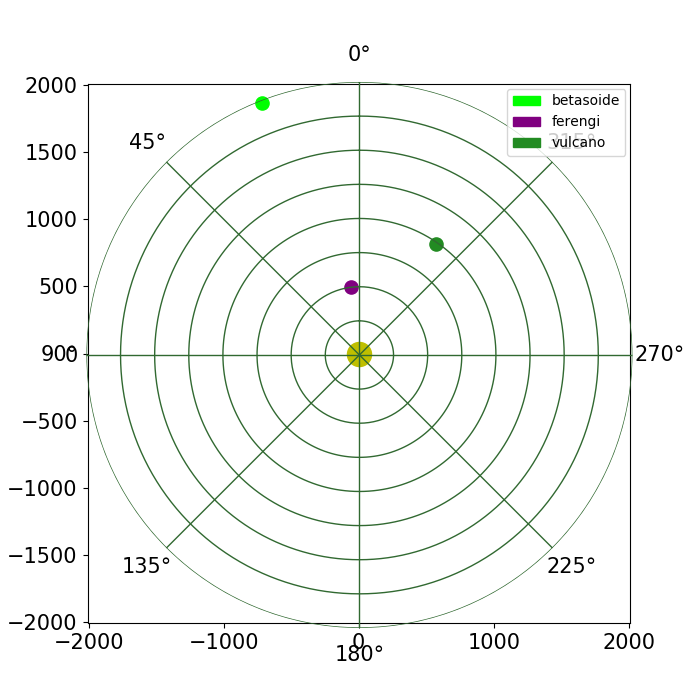

DEBUG:root:coordenadas día 7 = (x:-716.735899, y:1867.160853) theta=5.916666 rad
DEBUG:root:planeta!!-->-716.735899, 1867.160853
DEBUG:root:coordenadas día 7 = (x:-60.934672, y:496.273076) theta=6.161012 rad
DEBUG:root:planeta!!-->-60.934672, 496.273076
DEBUG:root:coordenadas día 7 = (x:573.576436, y:819.152044) theta=0.610865 rad
DEBUG:root:planeta!!-->573.576436, 819.152044


In [494]:
betasoide = Planeta('betasoide', 3, 2000)
ferengi = Planeta('ferengi', 1, 500)
vulcano = Planeta('vulcano', 5, 1000, False)

planetas = [betasoide, ferengi, vulcano]
betasoide.get_coordenadas_dia(1)

simulador = SimuladorGrafico(planetas)
simulador.simular_dia(dia=7)